<a href="https://colab.research.google.com/github/hojun1221/deeplearnning_is_essential/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%A4%EC%8A%B5_(%EB%B3%B5%EC%8A%B5)%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

나의 첫 collab입니다!



do it! 딥러닝!

In [ ]:
print("hello world!")

hello world!


In [ ]:
# 넘파이 패키지 사용
import numpy as np

In [ ]:
my_array = np.array([[10,20,30],[40,50,60]])
print(my_array)

[[10 20 30]
 [40 50 60]]


In [ ]:
type(my_array)

numpy.ndarray

In [ ]:
my_array[0][2]

30

In [ ]:
np.sum(my_array)

210

In [ ]:
for i in my_array:
  print(i)

[10 20 30]
[40 50 60]


In [ ]:
b = np.array([[10,20,30],[40,50,60],[70,80,90]])
print(b)

[[10 20 30]
 [40 50 60]
 [70 80 90]]


In [ ]:
# 맷플롯립 라이브러리 사용
import matplotlib.pyplot as plt

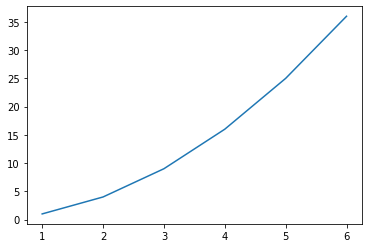

In [ ]:
plt.plot([1,2,3,4,5,6],[1,4,9,16,25,36])
plt.show()
# plot은 선그래프

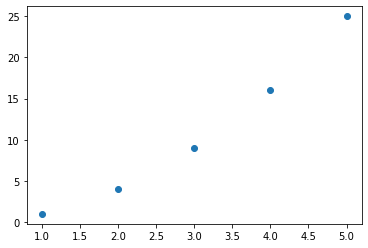

In [ ]:
plt.scatter([1,2,3,4,5],[1,4,9,16,25])
plt.show()
# scatter는 산점도

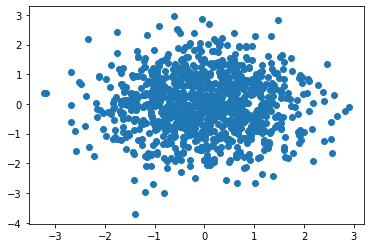

In [ ]:
x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x,y)
plt.show()

In [ ]:
# 선형회귀를 현실적인 문제에 적용
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [ ]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [ ]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [ ]:
diabetes.target[:3]

array([151.,  75., 141.])

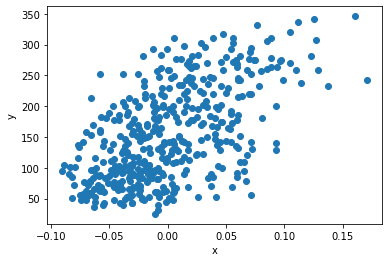

In [ ]:
# 당뇨병환자 데이터 시각화하기
plt.scatter(diabetes.data[:,2],diabetes.target)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
x = diabetes.data[:,2]
y = diabetes.target

In [ ]:
w = 1.0
b = 1.0
y_hat = w*x[0] + b
print(y_hat)




1.0616962065186832


In [ ]:

y[0]

151.0

In [ ]:
w_inc = w + 0.1
y_hat_inc = x[0]*w_inc + b
print(y_hat_inc)

1.0678658271705517


In [ ]:
w_rate = (y_hat_inc - y_hat)/(w_inc - w)

print(w_rate)

0.06169620651868429


In [ ]:
print(x[0])

0.061696206518683294


In [ ]:
w_new = w + w_rate
print(w_new)

1.0616962065186843


In [ ]:
err = y[0]-y_hat
w_new = w+w_rate*err
b_new = b+1*err
print(w_new,b_new)

10.250624555903848 150.9383037934813


In [ ]:
# 두번째 샘플 사용
y_hat = x[1]*w_new+b_new
err = y[1]-y_hat
w_rate = x[1]
w_new = w_new+w_rate*err
b_new = b_new+1*err
print(w_new,b_new)

14.132317616380695 75.52764127612656


In [ ]:
for x_i,y_i in zip(x,y):
  y_hat = x_i*w+b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate*err
  b = b + 1*err
print(w,b)

587.8654539985616 99.4093556453094


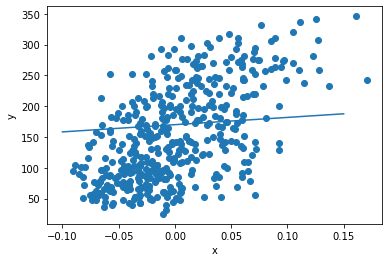

In [ ]:
plt.scatter(x,y)
pt1 = (-0.1,0.1*w+b)
pt2 = (0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
for i in range(1,10000):
  for x_i,y_i in zip(x,y):
    y_hat = x_i*w+b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate*err
    b = b + 1*err
print(w,b)

913.5973364346786 123.39414383177173


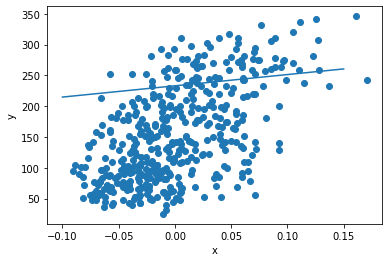

In [ ]:
plt.scatter(x,y)
pt1 = (-0.1,0.1*w+b)
pt2 = (0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
x_new = 0.18
y_pred = x_new*w +b
print(y_pred)



287.8416643900139


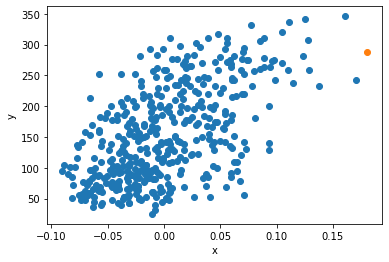

In [ ]:
plt.scatter(x,y)
plt.scatter(x_new,y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# 선형 회귀를 위한 뉴런 만들기
class Neuron:
  def __init__(self):
    self.w = 1.0
    self.b = 1.0
    
  def forpass(self,x):
   y_hat = x*self.w + self.b
   return y_hat

  def backprop(self,x,err):
    w_grad = x*err
    b_grad = 1*err
    return w_grad,b_grad

  def fit(self,x,y,epochs=100):
    for i in range(epochs):
      for x_i,y_i in zip(x,y):
        y_hat = self.forpass(x_i)
        err = -(y_i - y_hat)
        w_grad,b_grad = self.backprop(x_i,err)
        self.w = self.w - w_grad
        self.b = self.b - b_grad

In [ ]:
neuron = Neuron()
neuron.fit(x,y)

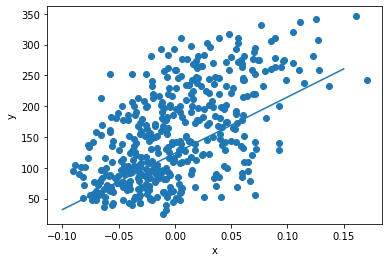

In [ ]:
plt.scatter(x,y)
pt1 = (-0.1,-0.1*neuron.w + neuron.b)
pt2 = (0.15,0.15*neuron.w + neuron.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

*# 1~3장 끝*